In [41]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [42]:
audio_file = 'C:/Users/Upris/Desktop/extreme api/Doggy-and-Cat-adventure/A_minor.wav'
y, sr = librosa.load(audio_file)

print(f"lenght signal {len(y)}")

lenght signal 264945


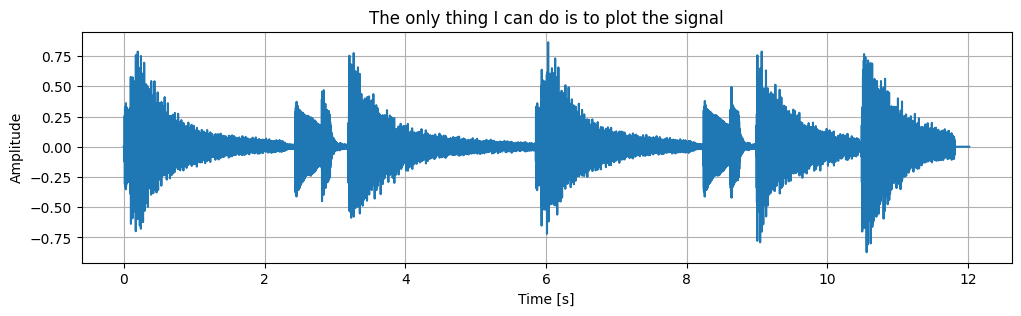

In [43]:
plt.figure(figsize=(12, 3))
plt.plot(np.arange(len(y)) / sr, y)
plt.title('The only thing I can do is to plot the signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [44]:
zcr = librosa.feature.zero_crossing_rate(y)
print(f"Zero crossing rate: {zcr.shape}")

Zero crossing rate: (1, 518)


In [45]:
def extract_features(file_path):
    y, sr = librosa.load(file_path)
    features = []

    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    features.extend(np.mean(mfccs, axis=1))  

    features.append(float(np.mean(librosa.feature.rms(y=y))))
    features.append(float(np.mean(librosa.feature.zero_crossing_rate(y))))
    features.append(float(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr))))
    features.append(float(np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr))))
    features.append(float(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr))))
    features.append(float(np.mean(librosa.feature.spectral_flatness(y=y))))

    chroma = librosa.feature.chroma_stft(y=y, sr=sr)
    features.extend(np.mean(chroma, axis=1))

    harmonic = librosa.effects.harmonic(y)
    tonnetz = librosa.feature.tonnetz(y=harmonic, sr=sr)
    features.extend(np.mean(tonnetz, axis=1))

    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)
    features.append(float(tempo))

    return np.array(features)


In [46]:
f = extract_features(audio_file)
    
print(f"RMS shape: {f.shape}")

print(f)

RMS shape: (38,)
[-3.99619659e+02  1.82684509e+02  5.58991585e+01 -1.51434336e+01
 -2.47224388e+01 -1.34340038e+01 -1.42150402e+01 -2.40005398e+01
 -2.84330654e+01 -2.62872639e+01 -2.24434948e+01 -2.33816986e+01
 -2.48338337e+01  9.20398906e-02  3.21511523e-02  4.85753734e+02
  5.04453590e+02  7.10055295e+02  1.35189854e-02  6.21248126e-01
  2.24309608e-01  3.05733025e-01  2.62311518e-01  5.13542354e-01
  1.70384094e-01  1.19147889e-01  3.31098348e-01  3.35048616e-01
  4.48319584e-01  2.51012653e-01  4.79207635e-01  3.97148645e-01
  1.51769017e-01  4.84995357e-02  3.29768374e-01  3.06866430e-02
  5.07758878e-02  1.61499023e+02]


C:\Users\Upris\AppData\Local\Temp\ipykernel_39436\1726695810.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  features.append(float(tempo))


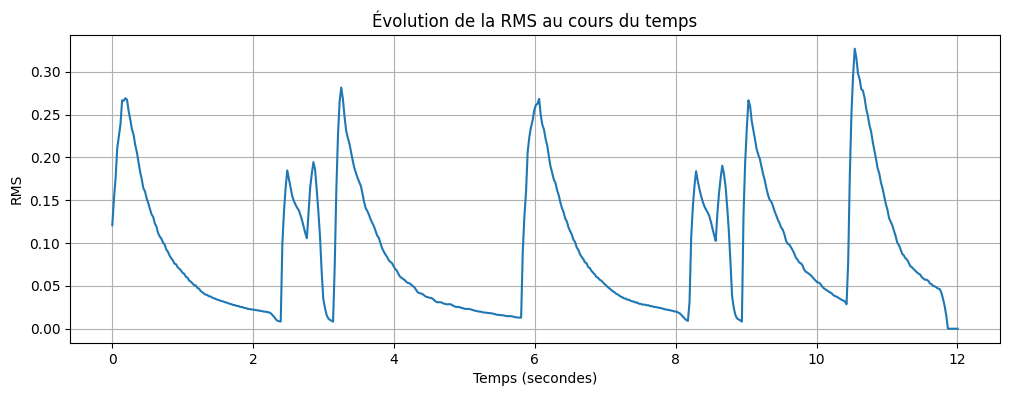

RMS shape: [1.20800756e-01 1.51659697e-01 1.75229385e-01 2.10463494e-01
 2.24143192e-01 2.38539442e-01 2.66634166e-01 2.66049653e-01
 2.69085854e-01 2.67253220e-01 2.53932476e-01 2.44165987e-01
 2.32681260e-01 2.26676449e-01 2.14709550e-01 2.06184506e-01
 1.94425508e-01 1.83374047e-01 1.74507841e-01 1.63848117e-01
 1.60246879e-01 1.52161032e-01 1.46532178e-01 1.40185833e-01
 1.33483171e-01 1.30526662e-01 1.22888058e-01 1.19286247e-01
 1.11690141e-01 1.07633695e-01 1.05167173e-01 1.00626014e-01
 9.84845981e-02 9.25002545e-02 8.99240151e-02 8.54831487e-02
 8.22264105e-02 7.99967796e-02 7.60005787e-02 7.52195939e-02
 7.17094988e-02 6.99844658e-02 6.79935068e-02 6.52249157e-02
 6.40444458e-02 6.06862307e-02 5.95574267e-02 5.62607497e-02
 5.48961274e-02 5.30116744e-02 5.08060679e-02 5.04960492e-02
 4.76508401e-02 4.67928499e-02 4.41919714e-02 4.25373316e-02
 4.11318354e-02 3.97439077e-02 3.95147614e-02 3.79213504e-02
 3.77042592e-02 3.64166275e-02 3.56061161e-02 3.49678732e-02
 3.40827145e-

In [47]:
rms = librosa.feature.rms(y=y)[0]
plt.figure(figsize=(12, 4))
frames = np.arange(len(rms))
t = librosa.frames_to_time(frames, hop_length=512, sr=sr)
plt.plot(t, np.array(rms), label='RMS')
plt.title("Évolution de la RMS au cours du temps")
plt.xlabel("Temps (secondes)")
plt.ylabel("RMS")
plt.grid(True)
plt.show()
print(f"RMS shape: {rms}")

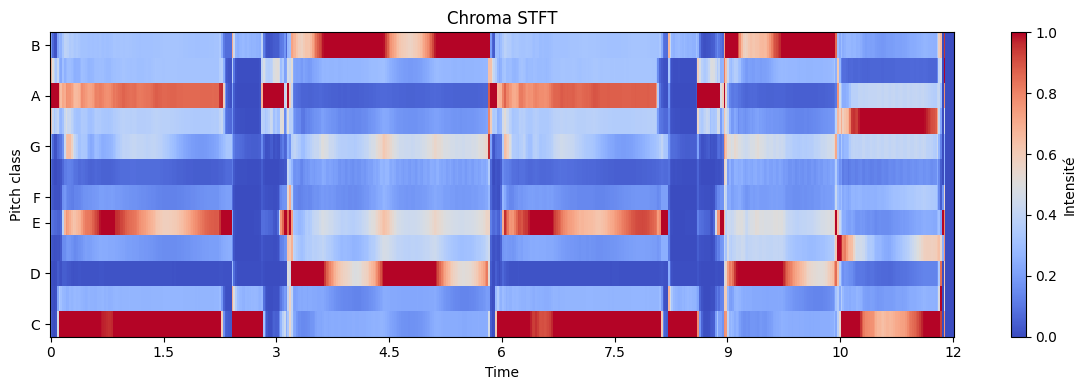

In [48]:
chroma = librosa.feature.chroma_stft(y=y, sr=sr)
plt.figure(figsize=(12, 4))
librosa.display.specshow(chroma, x_axis='time', y_axis='chroma', sr=sr, cmap='coolwarm')
plt.colorbar(label='Intensité')
plt.title('Chroma STFT')
plt.tight_layout()
plt.show()


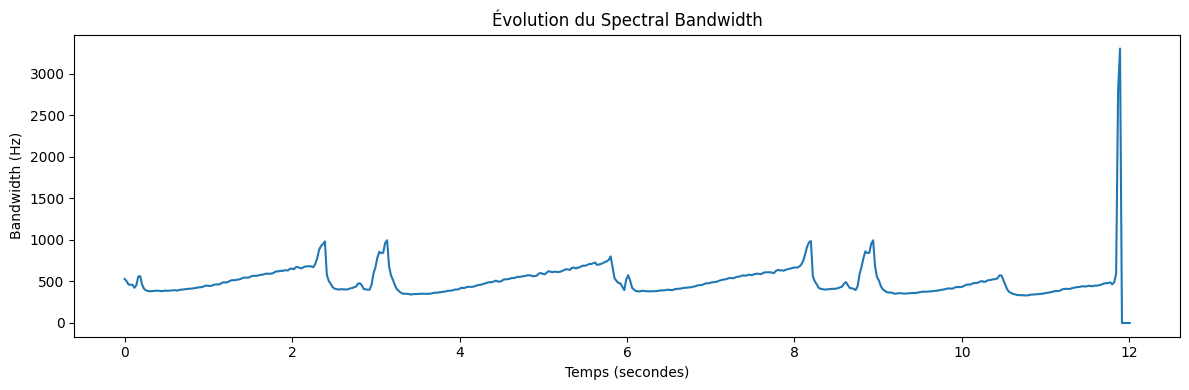

In [49]:
spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)[0]

times = librosa.times_like(spectral_bandwidth, sr=sr, hop_length=512)

plt.figure(figsize=(12, 4))
plt.plot(times, spectral_bandwidth)
plt.title('Évolution du Spectral Bandwidth')
plt.xlabel('Temps (secondes)')
plt.ylabel('Bandwidth (Hz)')
plt.tight_layout()
plt.show()

Valeur moyenne du Spectral Centroid : 485.75 Hz


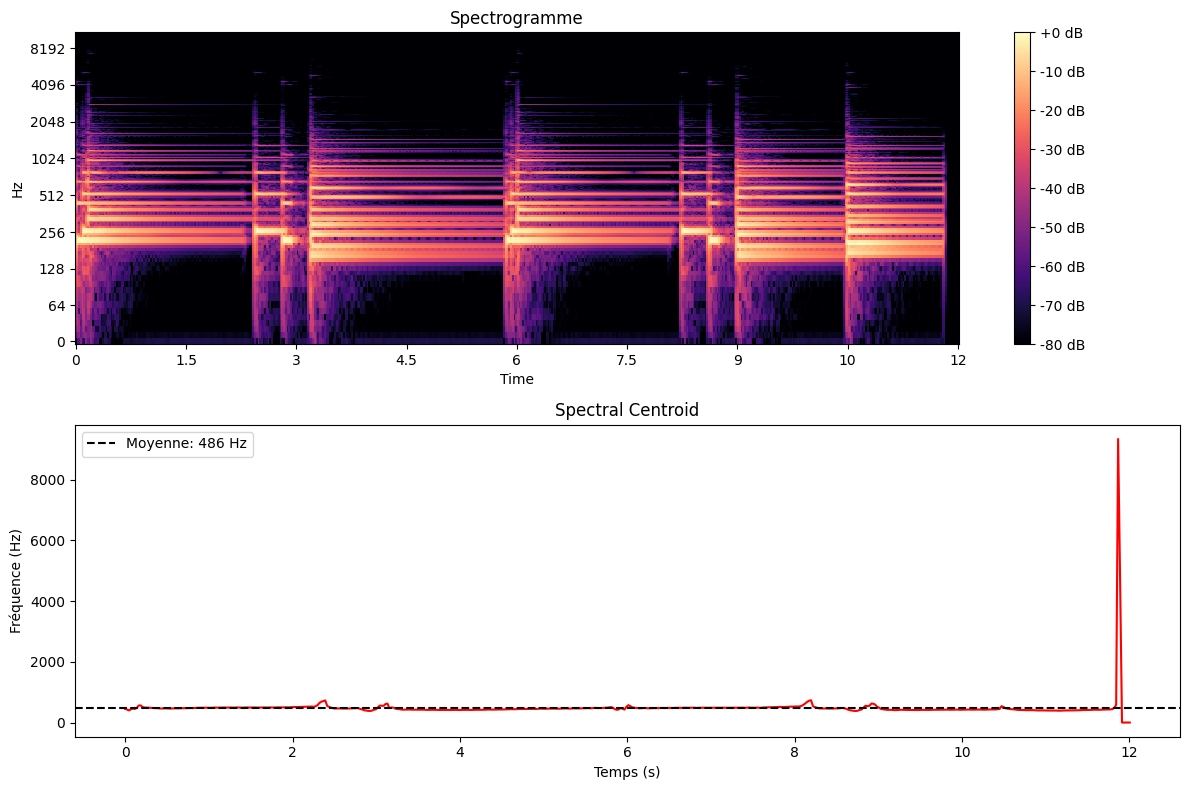

In [50]:
centroid = librosa.feature.spectral_centroid(y=y, sr=sr)[0]


frames = range(len(centroid))
t = librosa.frames_to_time(frames, sr=sr)


print(f"Valeur moyenne du Spectral Centroid : {np.mean(centroid):.2f} Hz")


plt.figure(figsize=(12, 8))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
plt.subplot(2, 1, 1)
librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogramme')


plt.subplot(2, 1, 2)
plt.plot(t, centroid, color='r')
plt.axhline(y=np.mean(centroid), color='k', linestyle='--', 
           label=f'Moyenne: {np.mean(centroid):.0f} Hz')
plt.legend()
plt.xlabel('Temps (s)')
plt.ylabel('Fréquence (Hz)')
plt.title('Spectral Centroid')

plt.tight_layout()
plt.show()

Spectral Flatness moyenne : 0.013518985360860825


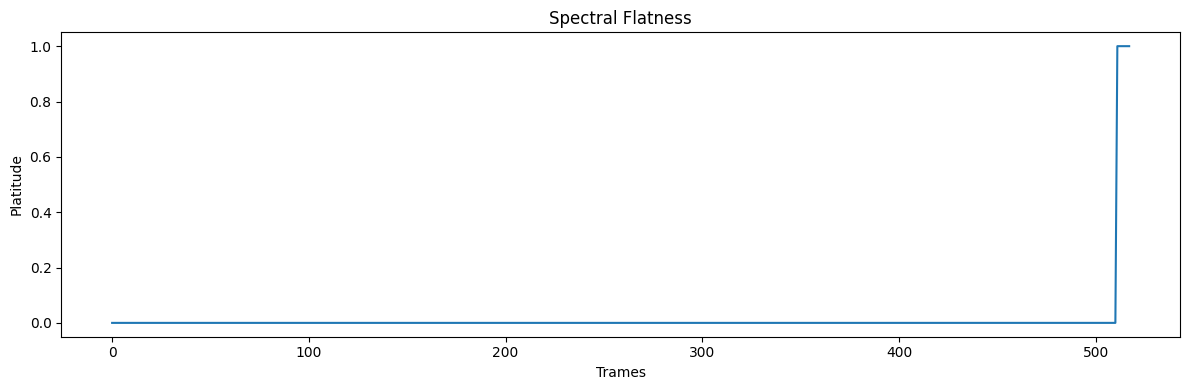

In [51]:
spectral_flatness = librosa.feature.spectral_flatness(y=y)

print(f"Spectral Flatness moyenne : {np.mean(spectral_flatness)}")

plt.figure(figsize=(12, 4))
plt.plot(spectral_flatness[0])
plt.title('Spectral Flatness')
plt.xlabel('Trames')
plt.ylabel('Platitude')
plt.tight_layout()
plt.show()

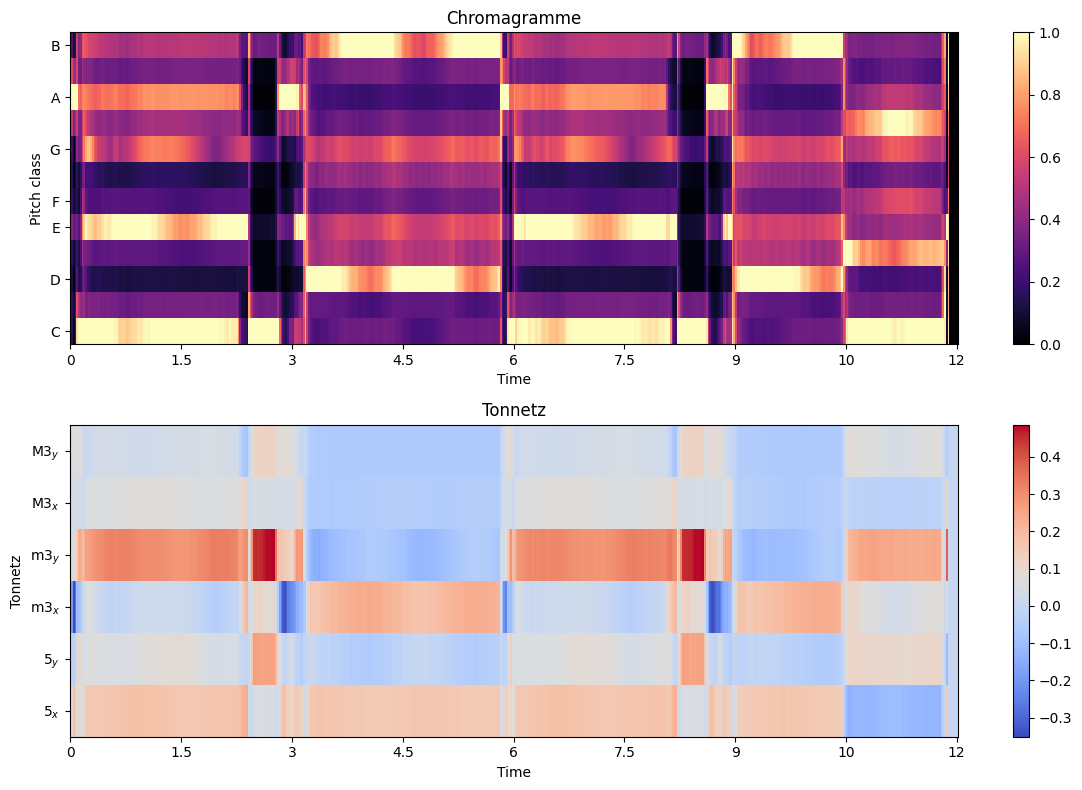

In [52]:

S = np.abs(librosa.stft(y))


chroma = librosa.feature.chroma_stft(S=S, sr=sr)

tonnetz = librosa.feature.tonnetz(y=y, sr=sr, chroma=chroma)

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Chromagramme')

plt.subplot(2, 1, 2)
librosa.display.specshow(tonnetz, y_axis='tonnetz', x_axis='time')
plt.colorbar()
plt.title('Tonnetz')

plt.tight_layout()
plt.show()
